In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

In [2]:
RANDOM_SEED = 0
VALIDATE_SIZE = 0.2

In [3]:
import os
os.getcwd()

'C:\\Users\\Hasan\\Desktop\\Studium\\_Masterstudium\\_Semester4\\Fachpraktikum AI Deep Learning Lab\\Credit Card Fraud\\ccf_students\\notebooks'

In [4]:
import sys
sys.path.append("../src/main/")

# Load Data

In [9]:
from data_loader import MyDataLoader

loader = MyDataLoader()
df_head = loader.load_head('../data/creditcard_2023_head.csv')
df_head

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [10]:
# Load setups
setup1 = loader.load_setup('../data/setup_1.pkl')

X_train = loader.transform_data(setup1['X_train'], is_train=True)
X_test = loader.transform_data(setup1['X_test'], is_train=False)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (255883, 29)
Testing Data Shape: (56864, 29)


In [11]:
y_test = setup1['y_test']
print("Testing Labels Data Shape:", y_test.shape)

Testing Labels Data Shape: (56864,)


### if wanted: additional min max scaling

In [144]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### if wanted: Robust Scaling

In [339]:
from sklearn.preprocessing import RobustScaler

# Instantiate the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make the data for DL models

In [15]:
from sklearn.model_selection import train_test_split

# train // validate - no labels since they're all clean anyway
X_train_, X_validate_ = train_test_split(X_train, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

In [16]:
X_train_transformed = X_train_
X_validate_transformed = X_validate_
X_test_transformed = X_test

In [17]:
batch_size = 128
epochs = 100

In [18]:
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_transformed)

# Create a dataset and data loader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Convert validation data to PyTorch tensors
X_val_tensor = torch.Tensor(X_validate_transformed)

# Create a dataset and data loader for validation
val_dataset = TensorDataset(X_val_tensor, X_val_tensor)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)

# Autoencoder

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [363]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 2),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 2),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Tanh()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Tanh()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### higher bottleneck value is better! bottleneck = 4, F1 = 89

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### higher dim in bottleneck e.g. 8 is not better, F1 = 88

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### ReLU function very bad (probably because of vanishing gradient problem)

In [111]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### does not work well!

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### a bit worse than best (with minmax scaling)

In [162]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### same as above

In [206]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### best model so far with minmax scaling F1 = 88 (batch size 64)

In [269]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### tanh with minmax scaling and BCE and bs = 64 (F1 = 90)

In [295]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### tanh with minmax scaling and MSE and bs = 128 (F1 = 90)

In [317]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 16),
            nn.Tanh(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.Tanh(),
            nn.Linear(8, 16),
            nn.Tanh(),
            nn.Linear(16, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### best model but with robust scaling (bad because large distribution of anomaly overlaps with normal data)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### best model with dropout (F1: 86%)

In [396]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim, dropout_rate=0.5):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Dropout(dropout_rate)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Parameter influences
- Batch size: 
    - 1024 is bad, distributions come closer
    - 256 is also good
    - 64 is much better

In [22]:
# Parameters
input_dim = X_train_transformed.shape[1]

# Create the model
autoencoder = Autoencoder(input_dim)
autoencoder

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=29, out_features=16, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): ELU(alpha=1.0)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=16, out_features=29, bias=True)
    (5): ELU(alpha=1.0)
  )
)

In [23]:
# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = autoencoder.to(device)

#### Loss function
- if ReLU / ELU at the end of decoder, use MSE
- if Sigmoid at the end of decoder, use BCE. Note that data needs to bin normalized between 0 and 1!

In [298]:
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [24]:
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

#### Training loop

In [25]:
# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement before stopping
min_delta = 0.001  # Minimum change to qualify as an improvement
best_loss = float('inf')
counter = 0

In [26]:
for epoch in range(epochs):
    # Training
    autoencoder.train()
    for data in train_loader:
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, targets = data
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
            outputs = autoencoder(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}, Val Loss: {val_loss:.8f}')

    # Check for improvement for early stopping
    if best_loss - val_loss > min_delta:
        best_loss = val_loss
        counter = 0
        # Save the best model
        torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs')
        break

Epoch [1/100], Loss: 0.27877125, Val Loss: 0.35345528
Epoch [2/100], Loss: 0.23171403, Val Loss: 0.33297070
Epoch [3/100], Loss: 0.28434855, Val Loss: 0.32532706
Epoch [4/100], Loss: 0.36245483, Val Loss: 0.32007289
Epoch [5/100], Loss: 0.22629921, Val Loss: 0.31576165
Epoch [6/100], Loss: 0.26008591, Val Loss: 0.30973334
Epoch [7/100], Loss: 0.28293997, Val Loss: 0.30409522
Epoch [8/100], Loss: 0.24881274, Val Loss: 0.30044832
Epoch [9/100], Loss: 0.26597881, Val Loss: 0.29823324
Epoch [10/100], Loss: 0.27888387, Val Loss: 0.29706495
Epoch [11/100], Loss: 0.32346427, Val Loss: 0.29522057
Epoch [12/100], Loss: 0.31767109, Val Loss: 0.29365851
Epoch [13/100], Loss: 0.29840913, Val Loss: 0.29823364
Epoch [14/100], Loss: 0.30120745, Val Loss: 0.29165206
Epoch [15/100], Loss: 0.34597245, Val Loss: 0.29022850
Epoch [16/100], Loss: 0.26106960, Val Loss: 0.28822045
Epoch [17/100], Loss: 0.25045195, Val Loss: 0.29688510
Epoch [18/100], Loss: 0.22076958, Val Loss: 0.28549298
Epoch [19/100], Los

In [402]:
# Convert the transformed test set to a PyTorch tensor
X_test_tensor = torch.Tensor(X_test_transformed).to(device)

In [403]:
# Get the model's reconstruction of the test set
autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(X_test_tensor).cpu().numpy()

In [404]:
# Calculate the MSE reconstruction loss per row
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [405]:
clean = mse[y_test == 0]
fraud = mse[y_test == 1]

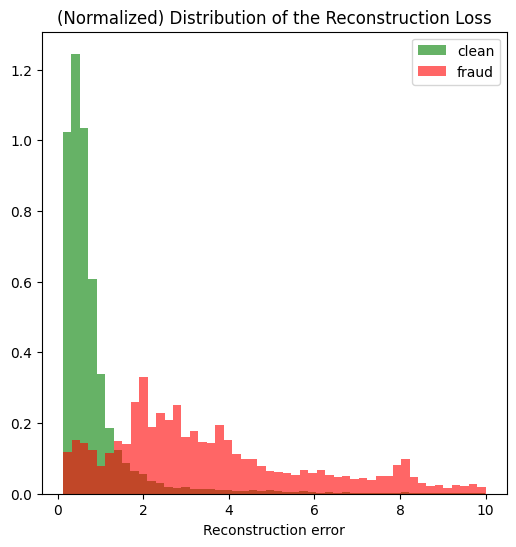

In [406]:
x_clip = 10 # was 10 / 0.050

# Plotting the distribution of reconstruction loss
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(clean[clean <= x_clip], bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud[fraud <= x_clip], bins=50, density=True, label="fraud", alpha=.6, color="red")
plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction error")
plt.legend()
plt.show()

C:\Users\Hasan\AppData\Local\Temp\ipykernel_24064\1735040835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean[clean <= 10], bins=50, label = 'Normal')
C:\Users\Hasan\AppData\Local\Temp\ipykernel_24064\1735040835.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud[fraud <= 10], bin

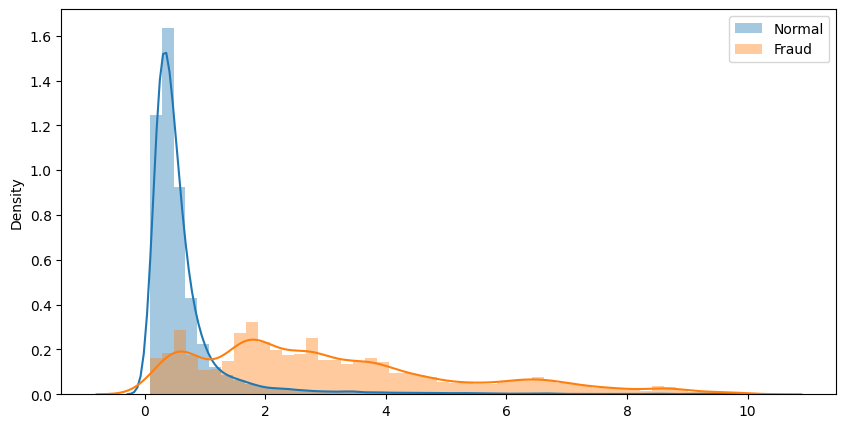

In [374]:
plt.figure(figsize = (10,5))
sns.distplot(clean[clean <= 10], bins=50, label = 'Normal')
sns.distplot(fraud[fraud <= 10], bins=50, label = 'Fraud')
plt.legend()
plt.show()

## Threshold 1: where max fraud begins

In [375]:
import numpy as np

# Assuming 'clean' and 'fraud' are the arrays containing your MSE values

# Define the number of bins
num_bins = 50

# Calculate histograms
clean_counts, clean_bins = np.histogram(clean[clean <= 10], bins=num_bins)
fraud_counts, fraud_bins = np.histogram(fraud[fraud <= 10], bins=num_bins)

# Find the bin with the most elements for clean data
max_clean_bin_index = np.argmax(clean_counts)
max_clean_bin_range = (clean_bins[max_clean_bin_index], clean_bins[max_clean_bin_index + 1])

# Find the bin with the most elements for fraud data
max_fraud_bin_index = np.argmax(fraud_counts)
max_fraud_bin_range = (fraud_bins[max_fraud_bin_index], fraud_bins[max_fraud_bin_index + 1])

print("Max clean bin range:", max_clean_bin_range)
print("Max fraud bin range:", max_fraud_bin_range)

Max clean bin range: (0.28010023816858154, 0.47770711988109194)
Max fraud bin range: (1.6779619642376185, 1.87605883991082)


In [380]:
threshold = max_fraud_bin_range[0]
#threshold = max_clean_bin_range[1]
threshold

1.6779619642376185

## Threshold 2: Brute-Forcing (Threshold that leads to best F1)

In [407]:
import numpy as np
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0
#c = 0

# Iterate over a range of possible thresholds
for threshold in np.linspace(min(mse), max(mse), num=1000):
    #print(c)
    #c = c + 1
    
    # Predict anomalies based on the threshold
    y_pred = (mse > threshold).astype(int)
    
    # Calculate F1 score
    current_f1 = f1_score(y_test, y_pred)
    
    # Update the best threshold if current F1 score is higher
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 1.062240323101038
Best F1 Score: 0.8696626957569268


In [408]:
threshold = best_threshold

## Threshold 3: manually through (visual) inspection

In [51]:
# Manually:
# threshold = 0.7

In [409]:
outliers = mse > threshold
print("Number of outliers: ", sum(outliers))

Number of outliers:  31336


In [410]:
y_pred = outliers
# Convert predictions to match y_test labels (1 for anomalies, 0 for normal)
y_pred = y_pred.astype(int)

Basic Evaluation Metrics:
Precision: 0.8293655859075824
Recall: 0.9140756893640968
F1-Score: 0.8696626957569268
AUC-ROC: 0.8630064715813169
MCC: 0.7298298110806288


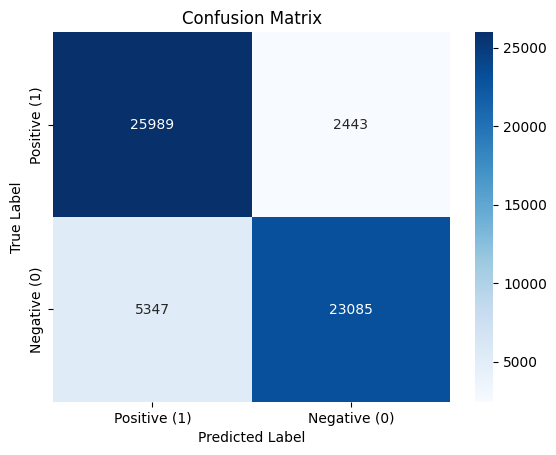

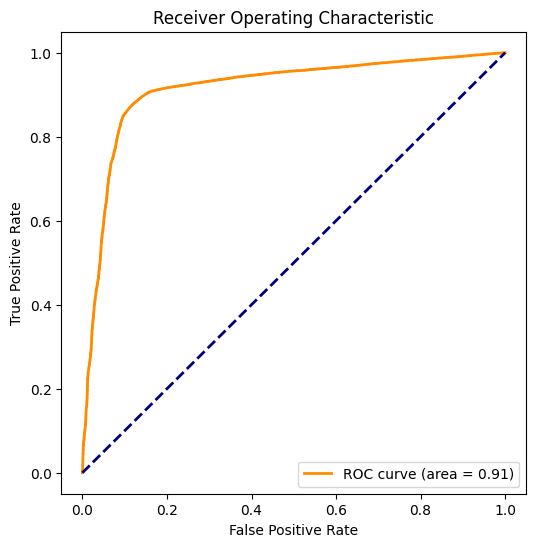

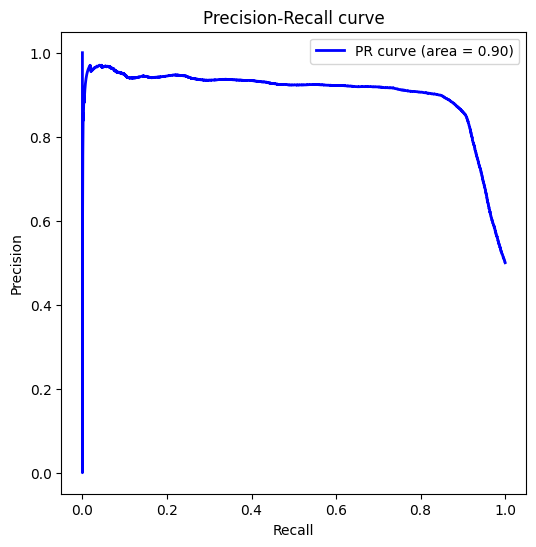

              precision    recall  f1-score   support

           0       0.90      0.81      0.86     28432
           1       0.83      0.91      0.87     28432

    accuracy                           0.86     56864
   macro avg       0.87      0.86      0.86     56864
weighted avg       0.87      0.86      0.86     56864



In [411]:
from evaluation import ModelEvaluator

evaluator = ModelEvaluator(y_test, y_pred, mse)
evaluator.full_report()

# Variational Autoencoder

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, input_dim)
        self.fc2 = nn.Linear(input_dim, 16)
        self.fc31 = nn.Linear(16, 8)  # Mean of the latent space
        self.fc32 = nn.Linear(16, 8)  # Standard deviation of the latent space

        # Decoder
        self.fc4 = nn.Linear(8, 16)
        self.fc5 = nn.Linear(16, input_dim)

    def encode(self, x):
        h1 = nn.functional.elu(self.fc1(x))
        h2 = nn.functional.elu(self.fc2(h1))
        return self.fc31(h2), self.fc32(h2)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = nn.functional.elu(self.fc4(z))
        return torch.sigmoid(self.fc5(h3))

    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, input_dim)
        self.fc2 = nn.Linear(input_dim, 16)
        self.fc31 = nn.Linear(16, 8)  # Mean of the latent space
        self.fc32 = nn.Linear(16, 8)  # Standard deviation of the latent space

        # Decoder
        self.fc4 = nn.Linear(8, 16)
        self.fc5 = nn.Linear(16, input_dim)

    def encode(self, x):
        h1 = nn.functional.relu(self.fc1(x))
        h2 = nn.functional.relu(self.fc2(h1))
        return self.fc31(h2), self.fc32(h2)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = nn.functional.relu(self.fc4(z))
        return torch.sigmoid(self.fc5(h3))

    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, input_dim))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

In [13]:
# Parameters
input_dim = X_train_transformed.shape[1]

# Create the model
vae = VariationalAutoencoder(input_dim)

# Define optimizer and modified loss function
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Loss function
def loss_function(recon_x, x, mu, log_var):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, input_dim), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = vae.to(device)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VariationalAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(input_dim, 16),
            nn.LeakyReLU(0.2)
        )
        
        # latent mean and variance
        self.mean_layer = nn.Linear(16, 2)
        self.logvar_layer = nn.Linear(16, 2)

        # Decoder
        self.fc3 = nn.Linear(16, input_dim)
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)  # Convert log variance to standard deviation
        epsilon = torch.randn_like(std)  # No need to specify device here; it will be the same as `std`
        return mean + epsilon * std


    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        x_hat = self.decode(z)
        return x_hat, mean, logvar

In [13]:
# Parameters
input_dim = X_train_transformed.shape[1]

# Create the model
vae = VariationalAutoencoder(input_dim)

# Define optimizer and modified loss function
optimizer = optim.Adam(vae.parameters(), lr=0.001)

def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD

In [14]:
# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = vae.to(device)

In [15]:
# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement before stopping
min_delta = 0.001  # Minimum change to qualify as an improvement
best_loss = float('inf')
counter = 0

In [16]:
for epoch in range(epochs):
    vae.train()
    train_loss = 0
    for inputs, _ in train_loader:  # _ since inputs are the same as targets
        inputs = inputs.to(device)
        optimizer.zero_grad()
        recon_batch, mu, log_var = vae(inputs)
        loss = loss_function(recon_batch, inputs, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    train_loss /= len(train_loader.dataset)

    # Validation
    vae.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, _ in val_loader:  # _ since inputs are the same as targets
            inputs = inputs.to(device)
            recon_batch, mu, log_var = vae(inputs)
            val_loss += loss_function(recon_batch, inputs, mu, log_var).item()

    val_loss /= len(val_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.8f}, Val Loss: {val_loss:.8f}')

    # Early stopping check
    if best_loss - val_loss > min_delta:
        best_loss = val_loss
        counter = 0
        torch.save(vae.state_dict(), 'best_vae.pth')
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs')
        break

Epoch [1/100], Train Loss: -195.12327695, Val Loss: -222.45490971
Epoch [2/100], Train Loss: -244.79831573, Val Loss: -271.04282815
Epoch [3/100], Train Loss: -288.50596696, Val Loss: -312.59349552
Epoch [4/100], Train Loss: -327.58399481, Val Loss: -342.34437528
Epoch [5/100], Train Loss: -349.43389462, Val Loss: -353.29532370
Epoch [6/100], Train Loss: -362.33366444, Val Loss: -373.25743529
Epoch [7/100], Train Loss: -377.25751279, Val Loss: -382.78001043
Epoch [8/100], Train Loss: -389.47183596, Val Loss: -395.05178733
Epoch [9/100], Train Loss: -400.82464873, Val Loss: -410.07172442
Epoch [10/100], Train Loss: -413.32329719, Val Loss: -420.90080108
Epoch [11/100], Train Loss: -425.69914666, Val Loss: -435.75905894
Epoch [12/100], Train Loss: -448.78136354, Val Loss: -463.38188465
Epoch [13/100], Train Loss: -466.47015697, Val Loss: -473.76032248
Epoch [14/100], Train Loss: -477.70702900, Val Loss: -485.78018202
Epoch [15/100], Train Loss: -486.43088514, Val Loss: -487.77634072
Epoc

KeyboardInterrupt: 

In [17]:
X_test_tensor = torch.Tensor(X_test_transformed).to(device)

In [18]:
vae.eval()
with torch.no_grad():
    reconstructions, _, _ = vae(X_test_tensor)  # Ignore mean and logvar for now
    reconstructions = reconstructions.cpu().numpy()

In [19]:
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [24]:
threshold = np.percentile(mse, 50)  # You might need to adjust this
outliers = mse > threshold
y_pred = outliers.astype(int)

Basic Evaluation Metrics:
Precision: 0.8090180078784468
Recall: 0.8090180078784468
F1-Score: 0.8090180078784469
AUC-ROC: 0.8090180078784468


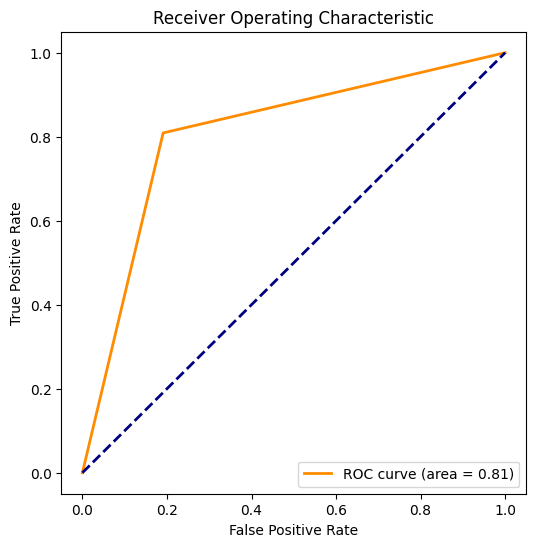

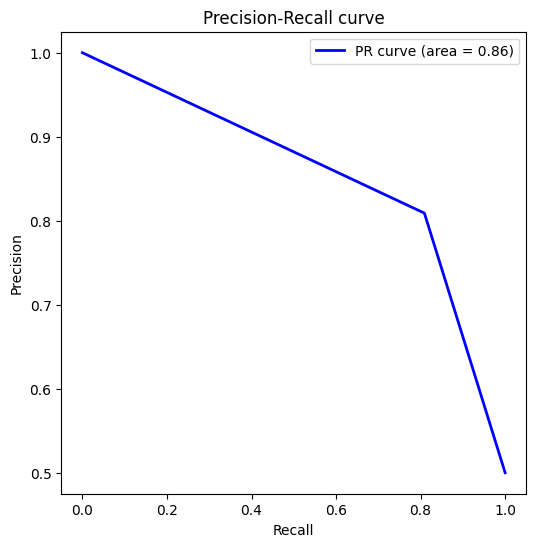

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     28432
           1       0.81      0.81      0.81     28432

    accuracy                           0.81     56864
   macro avg       0.81      0.81      0.81     56864
weighted avg       0.81      0.81      0.81     56864



In [31]:
from evaluation import ModelEvaluator

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.full_report()

In [38]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="upper right")
    plt.show()

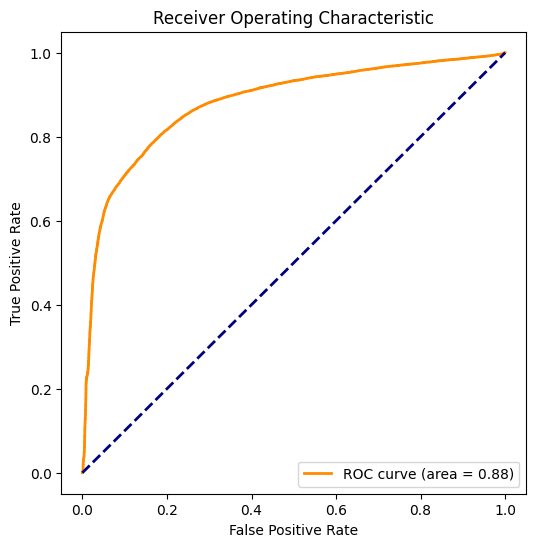

In [39]:
plot_roc_curve(y_test, mse)

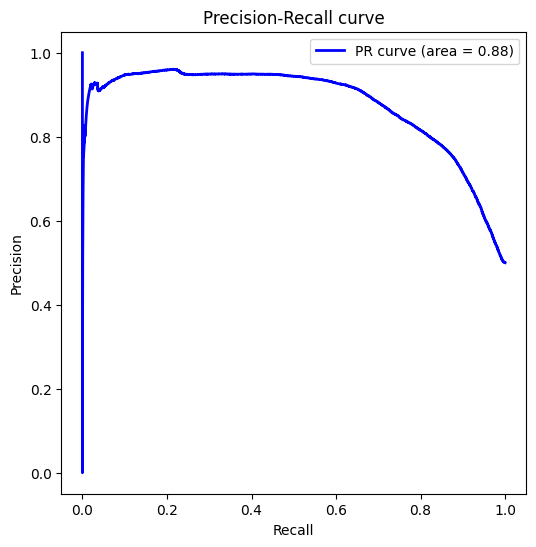

In [35]:
plot_precision_recall_curve(y_test, mse)

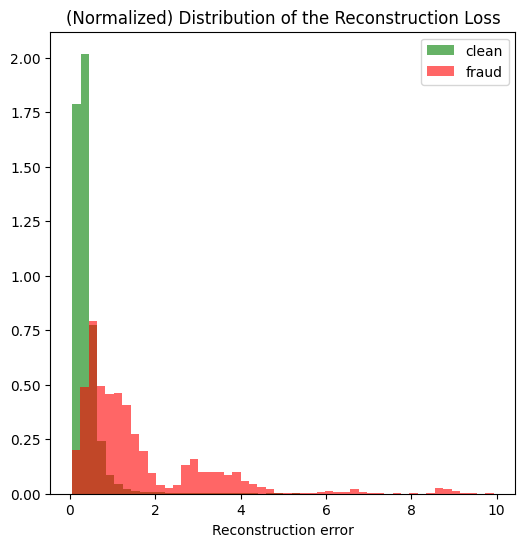

In [22]:
# Plotting the distribution of reconstruction loss
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(clean[clean <= 10], bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud[fraud <= 10], bins=50, density=True, label="fraud", alpha=.6, color="red")
plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction error")
plt.legend()
plt.show()

C:\Users\Hasan\AppData\Local\Temp\ipykernel_15532\302822058.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean, bins=50, label='Normal')
C:\Users\Hasan\AppData\Local\Temp\ipykernel_15532\302822058.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud, bins=50, label='Fraud')


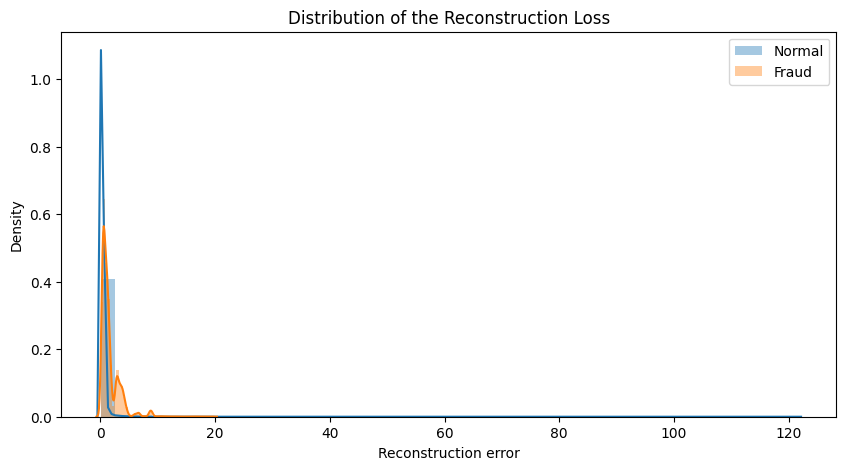

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

clean = mse[y_test == 0]
fraud = mse[y_test == 1]

plt.figure(figsize=(10, 5))
sns.distplot(clean, bins=50, label='Normal')
sns.distplot(fraud, bins=50, label='Fraud')
plt.legend()
plt.title("Distribution of the Reconstruction Loss")
plt.xlabel("Reconstruction error")
plt.show()